In [ ]:
# http://scikit-learn.org/stable/modules/decomposition.html

In [753]:
def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model,           # the model to grid search
                        params,          # the parameter set to try 
                        error_score=0.)  # if a parameter set raises an error, continue and set the performance as a big, fat 0
    grid.fit(X, y)           # fit the model and parameters
    # our classical metric for performance
    print "Best Accuracy: {}".format(grid.best_score_)
    # the best parameters that caused the best accuracy
    print "Best Parameters: {}".format(grid.best_params_)
    # the average time it took a model to fit to the data (in seconds)
    print "Average Time to Fit (s): {}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3))
    # the average time it took a model to predict out of sample data (in seconds)
    # this metric gives us insight into how this model will perform in real-time analysis
    print "Average Time to Score (s): {}".format(round(grid.cv_results_['mean_score_time'].mean(), 3))

In [754]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
iris = load_iris()

In [755]:
iris_X, iris_y = iris.data, iris.target

label_dict = {i: k for i, k in enumerate(iris.target_names)}

In [756]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [757]:
def plot(X, y, title, x_label, y_label):
    ax = plt.subplot(111)
    for label,marker,color in zip(
    range(3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0].real[y == label],
            y=X[:,1].real[y == label],
            color=color,
            alpha=0.5,
            label=label_dict[label]
            )

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

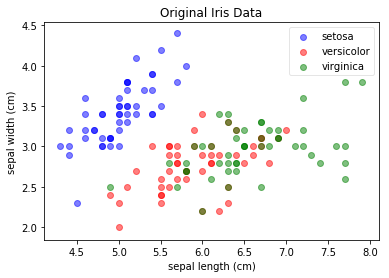

In [758]:
plot(iris_X, iris_y, "Original Iris Data", "sepal length (cm)", "sepal width (cm)")

In [759]:
from sklearn.decomposition import PCA, TruncatedSVD

pca = PCA(n_components=2)
svd = TruncatedSVD(n_components=2)

In [760]:
pca.fit(iris_X)
svd.fit(iris_X)

TruncatedSVD(algorithm='randomized', n_components=2, n_iter=5,
       random_state=None, tol=0.0)

In [761]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

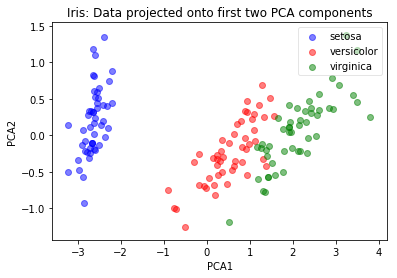

In [762]:
plot(pca.transform(iris_X), iris_y, "Iris: Data projected onto first two PCA components", "PCA1", "PCA2")

In [763]:
# percentage of variance in data explained by each component

pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557])

In [800]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [802]:
pca.mean_

array([ 5.84333333,  3.054     ,  3.75866667,  1.19866667])

In [805]:
iris_X.mean(axis=0)

array([ 5.84333333,  3.054     ,  3.75866667,  1.19866667])

In [740]:
svd.components_

array([[ 0.75116805,  0.37978837,  0.51315094,  0.16787934],
       [ 0.28583096,  0.54488976, -0.70889874, -0.34475845]])

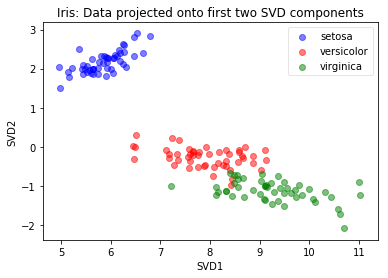

In [741]:
plot(svd.transform(iris_X), iris_y, "Iris: Data projected onto first two SVD components", "SVD1", "SVD2")

In [181]:
# percentage of variance in data explained by each component

svd.explained_variance_ratio_

array([ 0.53028106,  0.44685765])

In [807]:
from sklearn.preprocessing import StandardScaler
X_centered = StandardScaler(with_std=False).fit_transform(iris_X)

In [808]:
pca.fit(X_centered)
svd.fit(X_centered)

TruncatedSVD(algorithm='randomized', n_components=2, n_iter=5,
       random_state=None, tol=0.0)

In [809]:
pca.components_  # same components as before

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

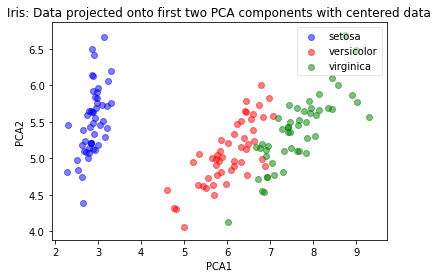

In [810]:
plot(pca.transform(iris_X), iris_y, "Iris: Data projected onto first two PCA components with centered data", "PCA1", "PCA2")

In [812]:
# percentage of variance in data explained by each component

pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557])

In [811]:
svd.components_  # same svd components as PCA when data are centered

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [813]:
svd.explained_variance_ratio_

array([ 0.92461621,  0.05301557])

In [814]:
# doing a normal z score scaling
X_scaled = StandardScaler().fit_transform(iris_X)

In [815]:
pca.fit(X_scaled)
svd.fit(X_scaled)

TruncatedSVD(algorithm='randomized', n_components=2, n_iter=5,
       random_state=None, tol=0.0)

In [816]:
# different components as cenetered data
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

In [817]:
# percentage of variance in data explained by each component

pca.explained_variance_ratio_

array([ 0.72770452,  0.23030523])

In [818]:
svd.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

In [820]:
# percentage of variance in data explained by each component

svd.explained_variance_ratio_

array([ 0.72770452,  0.23030523])

In [190]:
# how to interpret components

pca.components_  # a 2 x 4 matrix


array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

In [191]:
import numpy as np

# Multiply original matrix (150 x 4) by components transposed (4 x 2) to get new columns (150 x 2)
np.dot(X_scaled, pca.components_.T)[:5,]

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ]])

In [192]:
# This is how the transform method works in pca
pca.transform(X_scaled)[:5,]

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ]])

In [823]:
iris_2_dim = iris_X[:,2:4]

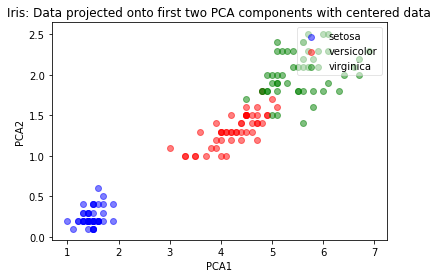

In [825]:
plot(iris_2_dim, iris_y, "Iris: Only 2 dimensions", "X", "Y")

In [827]:
twodim_pca = PCA(n_components=2)
iris_2_dim_transformed = twodim_pca.fit_transform(iris_2_dim)

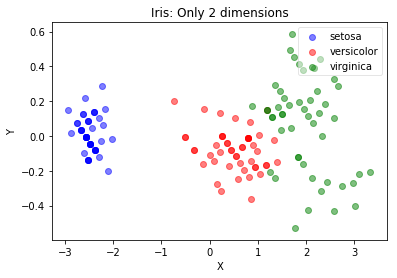

In [828]:
plot(iris_2_dim_transformed, iris_y, "Iris: PCA performed on only 2 dimensions", "PCA1", "PCA2")

[ 3.75866667  1.19866667] [ 5.52153913  1.94140159]
[ 3.75866667  1.19866667] [ 3.68477421  1.37404954]
[ -2.65269288e-15   4.87757982e-16]
[ -2.65269288e-15   4.87757982e-16]


[(-3, 3.1),
 (-5, 5),

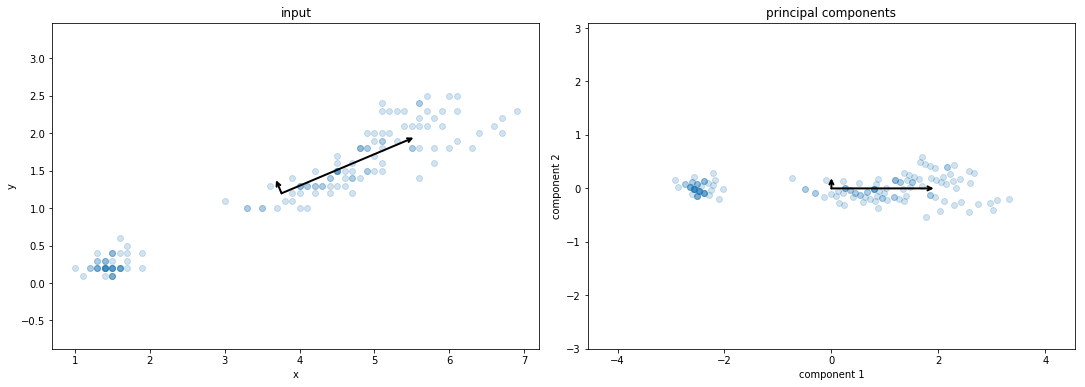

In [878]:
def draw_vector(v0, v1, ax):
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(iris_2_dim[:, 0], iris_2_dim[:, 1], alpha=0.2)
for length, vector in zip(twodim_pca.explained_variance_, twodim_pca.components_):
    v = vector * np.sqrt(length)
    print twodim_pca.mean_, twodim_pca.mean_ + v
    draw_vector(twodim_pca.mean_, twodim_pca.mean_ + v, ax=ax[0])
ax[0].axis('equal')
ax[0].set(xlabel='x', ylabel='y', title='input')

ax[1].scatter(iris_2_dim_transformed[:, 0], iris_2_dim_transformed[:, 1], alpha=0.2)
# draw_vector([0, 0], [0, 1], ax=ax[1])
# draw_vector([0, 0], [3, 0], ax=ax[1])
for length, vector in zip(twodim_pca.explained_variance_, twodim_pca.components_):
    transformed_component = np.dot(vector, twodim_pca.components_.T)
    v = transformed_component * np.sqrt(length)
    print iris_2_dim_transformed.mean(axis=0)
    draw_vector(iris_2_dim_transformed.mean(axis=0), 
                iris_2_dim_transformed.mean(axis=0) + v, ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

In [ ]:
# LDA is better than PCA for classification

In [193]:
# first flower (scaled data)
X_scaled[0]

array([-0.90068117,  1.03205722, -1.3412724 , -1.31297673])

In [194]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

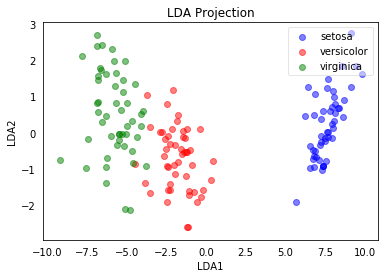

In [195]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda_sklearn = lda.fit_transform(iris_X, iris_y)
plot(X_lda_sklearn, iris_y, "LDA Projection", "LDA1", "LDA2")

In [196]:
# LDA1 is the best axis for SEPERATING the classes

In [197]:
lda.coef_

array([[  6.24621637,  12.24610757, -16.83743427, -21.13723331],
       [ -1.51666857,  -4.36791652,   4.64982565,   3.18640594],
       [ -4.72954779,  -7.87819105,  12.18760862,  17.95082737]])

In [254]:
# show that pca is same with or without scaling
# show that svd with scaled data is the same as pca
# truncated svd is better for sparse matrices (text)

In [255]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [256]:
single_pca = PCA(n_components=1)
single_lda = LinearDiscriminantAnalysis(n_components=1)

In [345]:
knn = KNeighborsClassifier(n_neighbors=1)

In [359]:
knn_average = cross_val_score(knn, iris_X, iris_y).mean()

knn_average

0.9673202614379085

In [360]:
# create a pipeline that performs PCA
pca_pipeline = Pipeline([('pca', single_pca), ('knn', knn)])

pca_average = cross_val_score(pca_pipeline, iris_X, iris_y).mean()

pca_average

0.9076797385620915

In [362]:
lda_pipeline = Pipeline([('lda', single_lda), ('knn', knn)])

lda_average = cross_val_score(lda_pipeline, iris_X, iris_y).mean()

# better prediction accuracy than PCA by a good amount, but not as good as original
lda_average

0.96037581699346397

In [363]:
# LDA is much better at creating axes for classification purposes

In [364]:
# try LDA with 2 components
lda_pipeline = Pipeline([('lda', LinearDiscriminantAnalysis(n_components=2)), 
                         ('knn', knn)])

lda_average = cross_val_score(lda_pipeline, iris_X, iris_y).mean()

# Just as good as using original data
lda_average

0.9673202614379085

In [ ]:
# http://scikit-learn.org/stable/modules/decomposition.html
# https://www.kaggle.com/datasf/case-data-from-san-f

In [365]:
import pandas as pd

In [534]:
hotel_reviews = pd.read_csv('../data/7282_1.csv')

In [535]:
hotel_reviews.shape

(35912, 19)

In [536]:
hotel_reviews.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


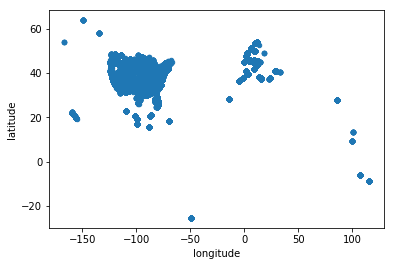

In [548]:
# Let's only include reviews from the US to try to only include english reviews

# plot the lats and longs of reviews
hotel_reviews.plot.scatter(x='longitude', y='latitude')

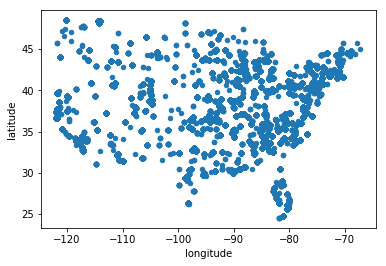

In [549]:
#Filter to only include datapoints within the US
hotel_reviews = hotel_reviews[((hotel_reviews['latitude']<=50.0) & (hotel_reviews['latitude']>=24.0)) & ((hotel_reviews['longitude']<=-65.0) & (hotel_reviews['longitude']>=-122.0))]

# Plot the lats and longs again
hotel_reviews.plot.scatter(x='longitude', y='latitude')
# Only looking at reviews that are coming from the US

In [550]:
hotel_reviews.shape

(30692, 19)

In [552]:
texts = hotel_reviews['reviews.text']

In [727]:
# import the sentence tokenizer from nltk
from nltk.tokenize import sent_tokenize
sent_tokenize("hello! I am Sinan. How are you??? I am fine")

['hello!', 'I am Sinan.', 'How are you???', 'I am fine']

In [561]:
sentences = reduce(lambda x, y:x+y, texts.apply(lambda x: sent_tokenize(str(x).decode('utf-8'))))

In [563]:
# the number of sentences
len(sentences)

118151

In [567]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')

tfidf_transformed = tfidf.fit_transform(sentences)

tfidf_transformed

<118151x280901 sparse matrix of type '<type 'numpy.float64'>'
	with 1180273 stored elements in Compressed Sparse Row format>

In [564]:
svd = TruncatedSVD(n_components=1000)
svd.fit(tfidf_transformed)

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
       random_state=None, tol=0.0)

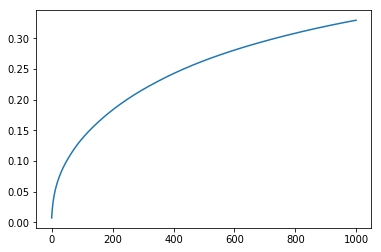

In [565]:
plt.plot(np.cumsum(svd.explained_variance_ratio_))

In [566]:
# 1,000 components captures about 30% of the variance

In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

In [570]:
tfidf = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
svd = TruncatedSVD(n_components=10)
normalizer = Normalizer()

lsa = Pipeline(steps=[('tfidf', tfidf), ('svd', svd), ('normalizer', normalizer)])

In [571]:
lsa.fit(sentences)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm=u'l2', preprocessor=None, smooth_idf=Tru...10, n_iter=5,
       random_state=None, tol=0.0)), ('normalizer', Normalizer(copy=True, norm='l2'))])

In [572]:
lsa_sentences = lsa.transform(sentences)

lsa_sentences.shape

(118151, 10)

In [582]:
cluster = KMeans(n_clusters=10)

In [583]:
cluster.fit(lsa_sentences)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [585]:
%%timeit
# time it takes to cluster on the original document-term matrix of shape (118151, 280901)
cluster.fit(tfidf_transformed)

1 loop, best of 3: 3min 51s per loop


In [586]:
%%timeit
# also time the prediction phase of the Kmeans clustering
cluster.predict(tfidf_transformed)

10 loops, best of 3: 98.3 ms per loop


In [588]:
%%timeit
# time the time to cluster after latent semantic analysis of shape (118151, 10)
cluster.fit(lsa_sentences)

1 loop, best of 3: 3.78 s per loop


In [589]:
%%timeit
# also time the prediction phase of the Kmeans clustering after LSA was performed
cluster.predict(lsa_sentences)

10 loops, best of 3: 30.6 ms per loop


In [574]:
# transform texts to a cluster distance space
# each row represents an obsercation
cluster.transform(lsa_sentences).shape

(118151, 10)

In [575]:
predicted_cluster = cluster.predict(lsa_sentences)
predicted_cluster

array([7, 7, 7, ..., 9, 7, 9], dtype=int32)

In [576]:
# Distribution of "topics"
pd.Series(predicted_cluster).value_counts(normalize=True)

0    0.243070
6    0.155911
5    0.102801
9    0.089140
1    0.086432
2    0.073525
7    0.071646
4    0.066931
3    0.066457
8    0.044088
dtype: float64

In [577]:
# create DataFrame of texts and predicted topics
texts_df = pd.DataFrame({'text':sentences, 'topic':predicted_cluster})

In [578]:
texts_df.head()

,text,topic
0,to share your opinion of this businesswith YP ...,7
1,to share your opinion of this businesswith YP ...,7
2,to share your opinion of this businesswith YP ...,7
3,"We had a wonderful, relaxing time.",0
4,The staff were completely attentive and accomm...,3


In [594]:
print "Top terms per cluster:"
original_space_centroids = svd.inverse_transform(cluster.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = lsa.steps[0][1].get_feature_names()
for i in range(10):
    print "Cluster %d:" % i
    print ', '.join([terms[ind] for ind in order_centroids[i, :5]])
    print 

Top terms per cluster:
Cluster 0:
great, location, breakfast, hotel, stay

Cluster 1:
hotel, room, good, great, stay

Cluster 2:
comfortable, bed, clean comfortable, bed comfortable, room

Cluster 3:
hotel, recommend, good, recommend hotel, hotel clean

Cluster 4:
room, room clean, hotel, good, nice

Cluster 5:
clean, room clean, rooms, clean comfortable, rooms clean

Cluster 6:
good, breakfast, breakfast good, room, great

Cluster 7:
stay, hotel, good, enjoyed stay, enjoyed

Cluster 8:
staff, friendly, staff friendly, helpful, friendly helpful

Cluster 9:
nice, room, hotel, staff, nice hotel



In [500]:
lsa.steps[0][1]

('tfidf',
 TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
         dtype=<type 'numpy.int64'>, encoding='latin-1', input=u'content',
         lowercase=True, max_df=1.0, max_features=None, min_df=1,
         ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
         stop_words=None, strip_accents=None, sublinear_tf=False,
         token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
         vocabulary=None))

# PCA with the Labeled Faces in the Wild (LFW) people dataset

In [601]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from time import time
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [602]:
# load the dataset
# the optional parameter: min_faces_per_person: 
# will only retain pictures of people that have at least min_faces_per_person different pictures.
# the optional parameter: resize is the ratio used to resize the each face picture.
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [603]:
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

In [604]:
# for machine learning we use the data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
y = lfw_people.target
n_features = X.shape[1]

In [605]:
X.shape

(1288, 1850)

'Hugo Chavez'

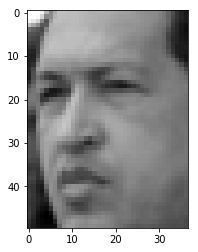

In [606]:
# plot one of the faces
plt.imshow(X[0].reshape((h, w)), cmap=plt.cm.gray)
lfw_people.target_names[y[0]]

'Hugo Chavez'

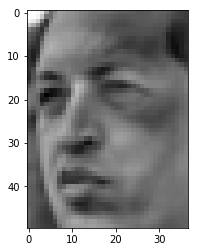

In [631]:
# plot one of the faces
plt.imshow(StandardScaler().fit_transform(X)[0].reshape((h, w)), cmap=plt.cm.gray)
lfw_people.target_names[y[0]]


'George W Bush'

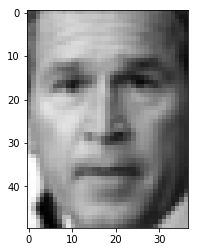

In [607]:
# let's plot another face
plt.imshow(X[100].reshape((h, w)), cmap=plt.cm.gray)
lfw_people.target_names[y[100]]

In [608]:
# the label to predict is the id of the person
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [700]:
# let's split our dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [701]:
# Compute a PCA (eigenfaces) on the face dataset 
n_components = 200

"""
from sklearn docs:

The optional parameter whiten=True makes it possible to project the data onto the singular space 
while scaling each component to unit variance. This is often useful if the models down-stream make strong 
assumptions on the isotropy of the signal: this is for example the case for 
Support Vector Machines with the RBF kernel and the K-Means clustering algorithm.
"""

pca = PCA(n_components=n_components, whiten=True)

preprocessing = Pipeline([('scale', StandardScaler()), ('pca', pca)])

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))

preprocessing.fit(X_train)

extracted_pca = preprocessing.steps[1][1]

eigenfaces = extracted_pca.components_.reshape((n_components, h, w))

Extracting the top 200 eigenfaces from 966 faces


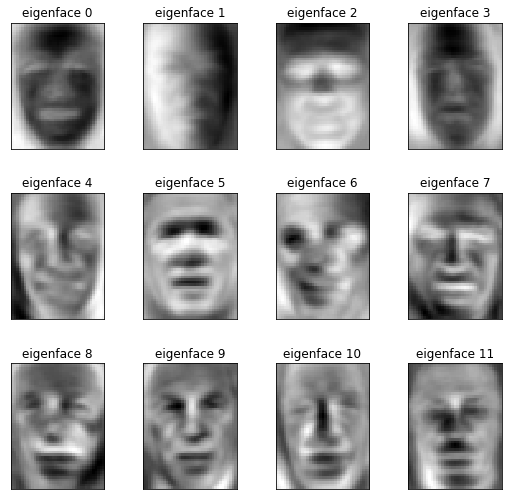

In [704]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

In [705]:
# Use a pipeline to make this process easier
logreg = LogisticRegression()
face_pipeline = Pipeline(steps=[('preprocessing', preprocessing), ('logistic', logreg)])

In [706]:
print "fitting preprocessing pipeline to X_train and transforming X"

pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

fitting preprocessing pipeline to X_train and transforming X


In [708]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints a more readable confusion matrix with heat labels and options for noramlization
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
param_grid = {'C': [1e-2, 1e-1,1e0,1e1, 1e2]}

0.813664596273 Accuracy score for best estimator
                   precision    recall  f1-score   support

     Ariel Sharon       0.72      0.68      0.70        19
     Colin Powell       0.85      0.71      0.77        55
  Donald Rumsfeld       0.62      0.72      0.67        25
    George W Bush       0.88      0.91      0.89       142
Gerhard Schroeder       0.79      0.84      0.81        31
      Hugo Chavez       0.87      0.81      0.84        16
       Tony Blair       0.71      0.71      0.71        34

      avg / total       0.82      0.81      0.81       322

None
40.3 seconds to grid search and predict the test set


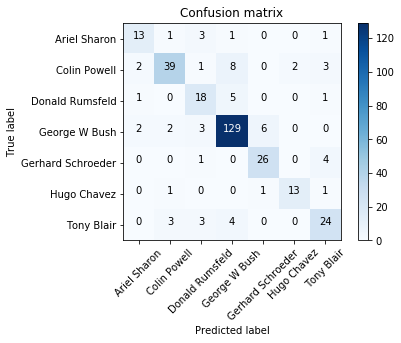

In [714]:
# fit without using PCA to see what the difference will be
t0 = time()

clf = GridSearchCV(logreg, param_grid)
clf = clf.fit(X_train, y_train)
best_clf = clf.best_estimator_

# Predicting people's names on the test set
y_pred = best_clf.predict(X_test)

print accuracy_score(y_pred, y_test), "Accuracy score for best estimator"
print(classification_report(y_test, y_pred, target_names=target_names))
print plot_confusion_matrix(confusion_matrix(y_test, y_pred, labels=range(n_classes)), target_names)
print round((time() - t0), 1), "seconds to grid search and predict the test set"

0.819875776398 Accuracy score for best estimator
                   precision    recall  f1-score   support

     Ariel Sharon       0.69      0.58      0.63        19
     Colin Powell       0.73      0.73      0.73        55
  Donald Rumsfeld       0.77      0.68      0.72        25
    George W Bush       0.87      0.93      0.90       142
Gerhard Schroeder       0.90      0.84      0.87        31
      Hugo Chavez       0.92      0.69      0.79        16
       Tony Blair       0.75      0.79      0.77        34

      avg / total       0.82      0.82      0.82       322

None
2.2 seconds to grid search and predict the test set


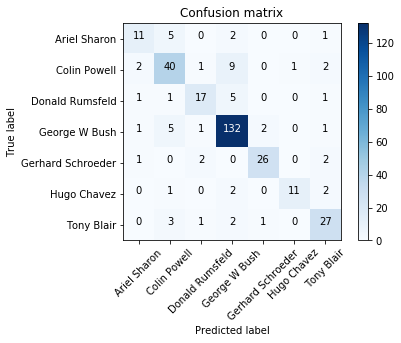

In [713]:
# now fit with PCA to see if our accuracy improves
t0 = time()

clf = GridSearchCV(logreg, param_grid)
clf = clf.fit(X_train_pca, y_train)
best_clf = clf.best_estimator_

# Predicting people's names on the test set
y_pred = best_clf.predict(X_test_pca)

print accuracy_score(y_pred, y_test), "Accuracy score for best estimator"
print(classification_report(y_test, y_pred, target_names=target_names))
print plot_confusion_matrix(confusion_matrix(y_test, y_pred, labels=range(n_classes)), target_names)
print round((time() - t0), 1), "seconds to grid search and predict the test set"

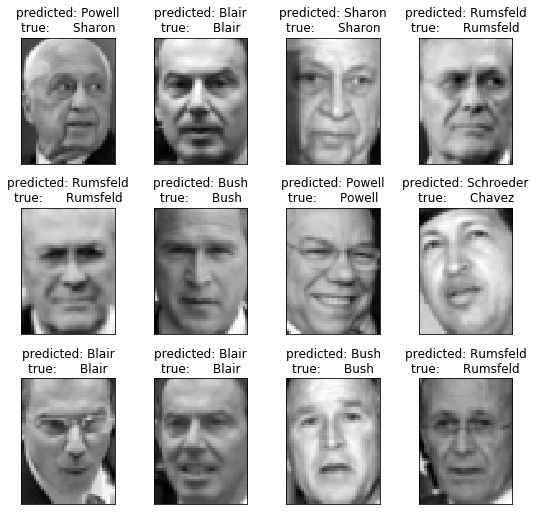

In [715]:
prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

In [725]:
# Create a larger pipeline to gridsearch
face_params = {'logistic__C':[1e-2, 1e-1, 1e0, 1e1, 1e2], 
               'preprocessing__pca__n_components':[100, 150, 200, 250, 300],
               'preprocessing__pca__whiten':[True, False],
               'preprocessing__lda__n_components':range(1, 7)  # [1, 2, 3, 4, 5, 6] recall the max allowed is n_classes-1
              }

pca = PCA()
lda = LinearDiscriminantAnalysis()

preprocessing = Pipeline([('scale', StandardScaler()), ('pca', pca), ('lda', lda)])

logreg = LogisticRegression()
face_pipeline = Pipeline(steps=[('preprocessing', preprocessing), ('logistic', logreg)])

In [726]:
get_best_model_and_accuracy(face_pipeline, face_params, X, y)

Best Accuracy: 0.841614906832
Best Parameters: {'logistic__C': 100.0, 'preprocessing__pca__n_components': 150, 'preprocessing__lda__n_components': 5, 'preprocessing__pca__whiten': True}
Average Time to Fit (s): 0.231
Average Time to Score (s): 0.01


In [ ]:
# much better than original data and very fast to predict and train!

In [ ]:
# talk about how these transformations are dope BUT they are predefined so we could learn new features based on training data
# SVD is SVD no matter what dataset you choose to work with